**Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.**

Answer:-

K-Means clustering is a partition-based algorithm where the number of clusters (K) must be specified in advance, and it groups data points by minimizing the distance to cluster centroids. It is fast and works well for large datasets. A common use case of K-Means is customer segmentation in marketing, where customers are grouped based on similar purchasing behavior.

Hierarchical clustering is a tree-based method that does not require choosing the number of clusters beforehand, as it builds a hierarchy of clusters by progressively merging or splitting groups. It is more suitable for smaller datasets and helps reveal relationships between clusters. A typical use case of hierarchical clustering is in biology, such as grouping genes or species based on similarity.

**Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.**

Answer:- The Silhouette Score is a metric used to evaluate the quality of clustering results. It helps measure how well data points have been grouped into clusters by comparing the similarity of a point to its own cluster versus other clusters. The score ranges from -1 to +1, where a high value indicates that the point is well matched to its cluster and far from neighboring clusters. A low or negative score suggests overlapping clusters or incorrect assignments. Silhouette Score is especially useful for selecting the optimal number of clusters and comparing different clustering algorithms.

**Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process? **

Answer:- DBSCAN has two core parameters: Epsilon (eps) and MinPts. Epsilon defines the radius around a data point within which other points are considered neighbors. MinPts specifies the minimum number of points required within this radius to form a dense region or cluster. If a point has enough neighbors within eps, it becomes a core point and starts a cluster. Points close to core points are added as border points, while points that do not meet the density requirement are labeled as noise or outliers. These parameters strongly influence cluster shape and detection.

**Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?**

Feature scaling is important when applying clustering algorithms like K-Means and DBSCAN because these methods rely heavily on distance calculations to group data points. In datasets where features have different ranges or units, variables with larger values can dominate the distance measure, leading to biased and incorrect clustering results. For example, if one feature represents income in thousands and another represents age in years, income will have a much bigger influence on the clustering process unless scaled properly.

In K-Means, clustering is based on minimizing the distance between points and centroids, so unscaled data can shift centroids unfairly toward larger-scale features. Similarly, DBSCAN identifies clusters using neighborhood distance (eps), and improper scaling can cause points to appear closer or farther than they truly are.

Scaling methods like standardization or normalization ensure that all features contribute equally, improving cluster accuracy, stability, and interpretability. Therefore, feature scaling is a crucial preprocessing step for effective clustering.

**Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?**

Answewr:- The Elbow Method is a technique used in K-Means clustering to find the optimal number of clusters (K). In K-Means, we must choose K in advance, and the Elbow Method helps make this choice more systematic. It works by running the algorithm for different values of K and calculating the Within-Cluster Sum of Squares (WCSS), which measures how closely points are grouped within each cluster. As K increases, WCSS decreases because clusters become smaller and tighter. However, after a certain point, the improvement becomes minimal. This point looks like an “elbow” in the graph of WCSS versus K. The value of K at the elbow is considered the optimal number of clusters, balancing accuracy and simplicity. Thus, the Elbow Method helps avoid choosing too few or too many clusters.

**Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.**

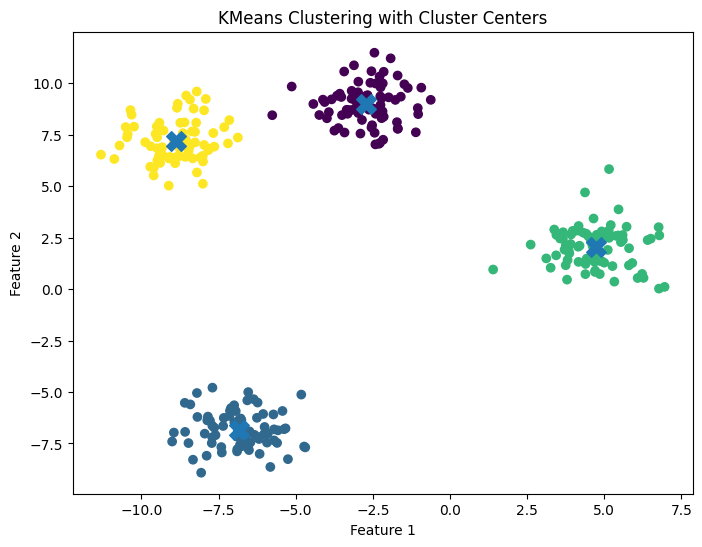

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot the clustered data points and cluster centers
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker='X', s=200)

plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).**

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Calculate number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 0


**Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.**

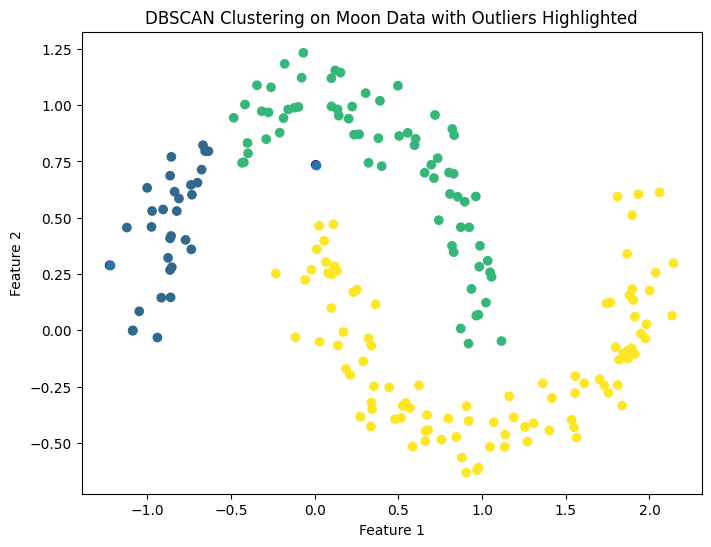

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

# Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify outliers (noise points labeled as -1)
outliers = labels == -1

# Plot clustered points
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels)

# Highlight outliers in a different color
plt.scatter(X[outliers, 0], X[outliers, 1])

plt.title("DBSCAN Clustering on Moon Data with Outliers Highlighted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


**Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot. **

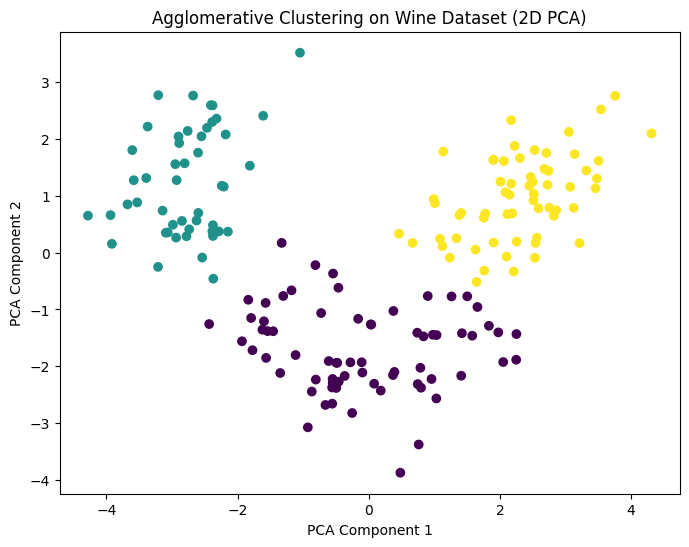

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dataset to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels = agg_cluster.fit_predict(X_pca)

# Visualize clustering results in 2D
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

plt.title("Agglomerative Clustering on Wine Dataset (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


**Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.**
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?

Real-World Data Science Workflow Using Clustering

In this scenario, I would mainly use K-Means clustering because it works well for large customer datasets and creates clear, well-separated customer groups. If the customer behavior has irregular shapes or includes outliers, I may also try DBSCAN to detect unusual customers.

First, I would preprocess the data by handling missing values (using mean for numeric and mode for categorical values). Then, I would apply StandardScaler because clustering algorithms rely on distance, and scaling ensures all features contribute equally.

To decide the optimal number of clusters, I would use the Elbow Method and Silhouette Score to evaluate cluster quality.

Finally, the marketing team benefits by targeting each segment with personalized promotions, such as offering discounts to high-value customers, re-engaging inactive customers, or recommending products based on cluster behavior.

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Simple customer dataset
df = pd.DataFrame({
    "Income": [40, 80, 60, 30, 90, 70],
    "Spending": [60, 20, 50, 80, 15, 40]
})

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)

# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X)

print("Cluster Labels:", labels)
print("Number of clusters:", len(set(labels)))


Cluster Labels: [0 1 0 0 1 1]
Number of clusters: 2
